# 1.查看数据特征

In [3]:
import numpy as np
import pandas as pd

inputfile = r"C:\Users\liuti\shopping_relate\GoodsOrder.csv"   # 输入的数据文件
data = pd.read_csv(inputfile,encoding = 'gbk')  # 读取数据

In [4]:
data .info()  # 查看数据属性

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43367 entries, 0 to 43366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      43367 non-null  int64 
 1   Goods   43367 non-null  object
dtypes: int64(1), object(1)
memory usage: 677.7+ KB


Goods列的数据类型是object（通常表示文本数据）。

In [5]:
data.head()

,id,Goods
0,1,柑橘类水果
1,1,人造黄油
2,1,即食汤
3,1,半成品面包
4,2,咖啡


In [6]:
data.describe()

,id
count,43367.000000
mean,4908.589504
std,2843.118248
min,1.000000
25%,2455.500000
50%,4828.000000
75%,7380.500000
max,9835.000000


结论：每列属性共有43367个观测值，并不存在缺失值。查看id属性的最大值、最小值，可知共收集了9835个购物篮数据.

# 2.分析热销商品

In [7]:
# 销量排行前10商品的销量及其占比
group = data.groupby(['Goods']).count().reset_index()  # 对商品进行分类汇总
sorted=group.sort_values('id',ascending=False)
#sorted（会显示全部的排序）
print('销量排行前10商品的销量:\n', sorted[:10])  # 排序并查看前10位热销商品


销量排行前10商品的销量:
      Goods    id
7     全脂牛奶  2513
8     其他蔬菜  1903
155    面包卷  1809
134     苏打  1715
150     酸奶  1372
99     瓶装水  1087
70   根茎类蔬菜  1072
85    热带水果  1032
143    购物袋   969
160     香肠   924


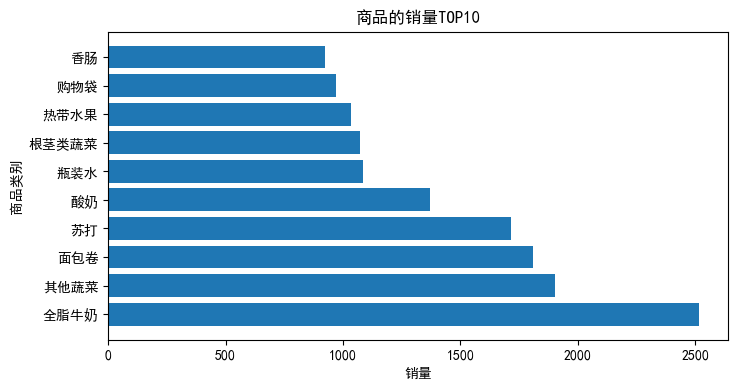

In [8]:
# 画条形图展示出销量排行前10商品的销量
import matplotlib.pyplot as plt

x=sorted[:10]['Goods']
y=sorted[:10]['id']
plt.figure(figsize = (8, 4))  # 设置画布大小 

plt.barh(x,y)
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.xlabel('销量')  # 设置x轴标题
plt.ylabel('商品类别')  # 设置y轴标题
plt.title('商品的销量TOP10')  # 设置标题
plt.show()  # 展示图片

In [9]:
# 销量排行前10商品的销量占比
data_nums = data.shape[0]  #计算data 的总行数
for idnex, row in sorted[:10].iterrows():   #iterrows() 方法，用于迭代DataFrame的行。
    print(row['Goods'],row['id'],row['id']/data_nums)


全脂牛奶 2513 0.05794728710770863
其他蔬菜 1903 0.0438812922268084
面包卷 1809 0.04171374547466968
苏打 1715 0.039546198722530956
酸奶 1372 0.031636958978024765
瓶装水 1087 0.025065141697604168
根茎类蔬菜 1072 0.024719256577582033
热带水果 1032 0.023796896257523
购物袋 969 0.022344178753430026
香肠 924 0.021306523393363617


得出结论：全脂牛奶销量最高，其次是其他蔬菜、面包卷等

# 3.各类别商品的销量及其占比

In [13]:
inputfile1 = r"C:\Users\liuti\shopping_relate\GoodsOrder.csv"
inputfile2 = r"C:\Users\liuti\shopping_relate\GoodsTypes.csv"
data = pd.read_csv(inputfile1,encoding = 'gbk')
types = pd.read_csv(inputfile2,encoding = 'gbk')  # 读入数据

In [39]:
group = data.groupby(['Goods']).count().reset_index()
sort = group.sort_values('id',ascending = False).reset_index()   #sort对象必须要先定义，删除sort才不会出错。不然是找不到的
data_nums = data.shape[0]  # 总量
del sort['index']

sort_links = pd.merge(sort,types)  # 合并两个datafreame(sort,types)， 根据共同属性


In [40]:
sort_links

,Goods,id,Types
0,全脂牛奶,2513,非酒精饮料
1,其他蔬菜,1903,果蔬
2,面包卷,1809,西点
3,苏打,1715,非酒精饮料
4,酸奶,1372,食品类
...,...,...,...
163,厨房用具,4,百货
164,包装袋,4,百货
165,防腐用品,2,百货
166,婴儿食品,1,百货


In [41]:
# 根据类别求和，每个商品类别的总量，并排序
sort_link = sort_links.groupby(['Types']).sum().reset_index()   #先合成一类

C:\Users\liuti\AppData\Local\Temp\ipykernel_5568\1997162810.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sort_link = sort_links.groupby(['Types']).sum().reset_index()   #先合成一类


In [42]:
sort_link

,Types,id
0,果蔬,7146
1,熟食,541
2,百货,5141
3,米粮调料,5185
4,肉类,4870
5,西点,7192
6,酒精饮料,2287
7,零食,1459
8,非酒精饮料,7594
9,食品类,1870


In [43]:
sort_link = sort_link.sort_values('id',ascending = False).reset_index()  #再按类销量排序

In [44]:
sort_link

,index,Types,id
0,8,非酒精饮料,7594
1,5,西点,7192
2,0,果蔬,7146
3,3,米粮调料,5185
4,2,百货,5141
5,4,肉类,4870
6,6,酒精饮料,2287
7,9,食品类,1870
8,7,零食,1459
9,1,熟食,541


In [45]:
del sort_link['index']  # 删除“index”列

In [46]:
sort_link

,Types,id
0,非酒精饮料,7594
1,西点,7192
2,果蔬,7146
3,米粮调料,5185
4,百货,5141
5,肉类,4870
6,酒精饮料,2287
7,食品类,1870
8,零食,1459
9,熟食,541


In [47]:
# 求百分比，然后更换id的列名为count
sort_link['count'] = sort_link.apply(lambda line: line['id']/data_nums,axis=1)
sort_link.rename(columns = {'count':'percent'},inplace = True)
print('各类别商品的销量及其占比:\n',sort_link)

各类别商品的销量及其占比:
    Types    id   percent
0  非酒精饮料  7594  0.175110
1     西点  7192  0.165840
2     果蔬  7146  0.164780
3   米粮调料  5185  0.119561
4     百货  5141  0.118546
5     肉类  4870  0.112297
6   酒精饮料  2287  0.052736
7    食品类  1870  0.043120
8     零食  1459  0.033643
9     熟食   541  0.012475


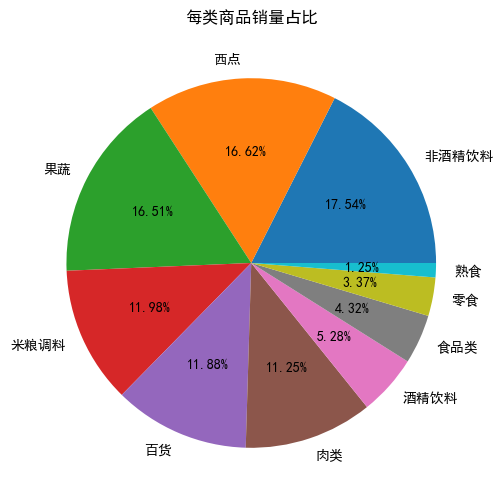

In [48]:
# 画饼图展示每类商品销量占比
data = sort_link['percent']
labels = sort_link['Types']
plt.figure(figsize=(8, 6))  # 设置画布大小   
plt.pie(data,labels=labels,autopct='%1.2f%%')
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title('每类商品销量占比')  # 设置标题
plt.show()

结果分析：非酒精饮料、果蔬、西点这三类差距不大，共占总销量的50%左右；根据大类分析，可食用的品类占据总销量的90%左右，说明顾客倾向于购买此类商品，而其余商品并非主力军。

# 查看销量第一的：“非酒精饮料”内部商品的销量及其占比

In [50]:
# 先筛选“非酒精饮料”类型的商品，然后求百分比，然后输出结果到文件。
selected = sort_links.loc[sort_links['Types'] == '非酒精饮料']  # 挑选商品类别为“非酒精饮料”并排序


In [51]:
selected

,Goods,id,Types
0,全脂牛奶,2513,非酒精饮料
3,苏打,1715,非酒精饮料
5,瓶装水,1087,非酒精饮料
16,水果/蔬菜汁,711,非酒精饮料
22,咖啡,571,非酒精饮料
38,超高温杀菌的牛奶,329,非酒精饮料
45,其他饮料,279,非酒精饮料
51,一般饮料,256,非酒精饮料
101,速溶咖啡,73,非酒精饮料
125,茶,38,非酒精饮料


In [52]:
child_nums = selected['id'].sum()  # 对所有的“非酒精饮料”求和
selected['child_percent'] = selected.apply(lambda line: line['id']/child_nums,axis = 1)  # 求百分比
selected.rename(columns = {'id':'count'},inplace = True)
print('非酒精饮料内部商品的销量及其占比:\n',selected)


非酒精饮料内部商品的销量及其占比:
         Goods  count  Types  child_percent
0        全脂牛奶   2513  非酒精饮料       0.330919
3          苏打   1715  非酒精饮料       0.225836
5         瓶装水   1087  非酒精饮料       0.143139
16     水果/蔬菜汁    711  非酒精饮料       0.093627
22         咖啡    571  非酒精饮料       0.075191
38   超高温杀菌的牛奶    329  非酒精饮料       0.043324
45       其他饮料    279  非酒精饮料       0.036740
51       一般饮料    256  非酒精饮料       0.033711
101      速溶咖啡     73  非酒精饮料       0.009613
125         茶     38  非酒精饮料       0.005004
144      可可饮料     22  非酒精饮料       0.002897


C:\Users\liuti\AppData\Local\Temp\ipykernel_5568\3167119101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['child_percent'] = selected.apply(lambda line: line['id']/child_nums,axis = 1)  # 求百分比
C:\Users\liuti\AppData\Local\Temp\ipykernel_5568\3167119101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected.rename(columns = {'id':'count'},inplace = True)


In [53]:
del selected['Types']

In [115]:
selected.head(5)

,Goods,count,child_percent
0,全脂牛奶,2513,0.330919
3,苏打,1715,0.225836
5,瓶装水,1087,0.143139
16,水果/蔬菜汁,711,0.093627
22,咖啡,571,0.075191


结论：在非酒精饮料中，全脂牛奶占比最高，和苏打、瓶装水相加，销量超过70%，说明大部分顾客到店购买的饮料为这三种，而商场就需要时常补充这类货物。

In [113]:

selected2 = sort_links.loc[sort_links['Types'] == '西点']  
child_nums2 = selected2['id'].sum()  
selected2['child_percent'] = selected2.apply(lambda line: line['id']/child_nums2,axis = 1)  # 求百分比
selected2.rename(columns = {'id':'count'},inplace = True)



C:\Users\liuti\AppData\Local\Temp\ipykernel_5568\12735392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected2['child_percent'] = selected2.apply(lambda line: line['id']/child_nums2,axis = 1)  # 求百分比
C:\Users\liuti\AppData\Local\Temp\ipykernel_5568\12735392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected2.rename(columns = {'id':'count'},inplace = True)


In [116]:
selected2.head(7)

,Goods,count,Types,child_percent
2,面包卷,1809,西点,0.251529
10,糕点,875,西点,0.121663
18,黑面包,638,西点,0.088710
31,白面包,414,西点,0.057564
32,奶油乳酪,390,西点,0.054227
33,威化饼,378,西点,0.052558
34,咸点心,372,西点,0.051724


# 数据预处理

通过对数据探索发现，数据完整，并不存在缺失值，建模之前需要转换数据的格式，才能使用Apriori函数进行关联分析。

In [63]:
data = pd.read_csv(inputfile1,encoding = 'gbk')

In [64]:
data.head(10)

,id,Goods
0,1,柑橘类水果
1,1,人造黄油
2,1,即食汤
3,1,半成品面包
4,2,咖啡
5,2,热带水果
6,2,酸奶
7,3,全脂牛奶
8,4,奶油乳酪
9,4,肉泥


In [65]:
# 根据id对“Goods”列合并，并使用“，”将各商品隔开
data['Goods'] = data['Goods'].apply(lambda x:','+x)

In [66]:
data.head(10)

,id,Goods
0,1,",柑橘类水果"
1,1,",人造黄油"
2,1,",即食汤"
3,1,",半成品面包"
4,2,",咖啡"
5,2,",热带水果"
6,2,",酸奶"
7,3,",全脂牛奶"
8,4,",奶油乳酪"
9,4,",肉泥"


In [67]:
data = data.groupby('id').sum().reset_index()

In [68]:
data.head(10)

,id,Goods
0,1,",柑橘类水果,人造黄油,即食汤,半成品面包"
1,2,",咖啡,热带水果,酸奶"
2,3,",全脂牛奶"
3,4,",奶油乳酪,肉泥,仁果类水果,酸奶"
4,5,",炼乳,长面包,其他蔬菜,全脂牛奶"
5,6,",腐蚀性清洁剂,黄油,白饭,全脂牛奶,酸奶"
6,7,",面包卷"
7,8,",瓶装啤酒,开胃酒,其他蔬菜,面包卷,超高温杀菌的牛奶"
8,9,",盆栽"
9,10,",谷物,全脂牛奶"


In [69]:
# 对合并的商品列转换数据格式
data['Goods'] = data['Goods'].apply(lambda x :[x[1:]])

In [70]:
data.head(10)

,id,Goods
0,1,"[柑橘类水果,人造黄油,即食汤,半成品面包]"
1,2,"[咖啡,热带水果,酸奶]"
2,3,[全脂牛奶]
3,4,"[奶油乳酪,肉泥,仁果类水果,酸奶]"
4,5,"[炼乳,长面包,其他蔬菜,全脂牛奶]"
5,6,"[腐蚀性清洁剂,黄油,白饭,全脂牛奶,酸奶]"
6,7,[面包卷]
7,8,"[瓶装啤酒,开胃酒,其他蔬菜,面包卷,超高温杀菌的牛奶]"
8,9,[盆栽]
9,10,"[谷物,全脂牛奶]"


In [72]:
data_list = list(data['Goods'])
data_list

[['柑橘类水果,人造黄油,即食汤,半成品面包'],
 ['咖啡,热带水果,酸奶'],
 ['全脂牛奶'],
 ['奶油乳酪,肉泥,仁果类水果,酸奶'],
 ['炼乳,长面包,其他蔬菜,全脂牛奶'],
 ['腐蚀性清洁剂,黄油,白饭,全脂牛奶,酸奶'],
 ['面包卷'],
 ['瓶装啤酒,开胃酒,其他蔬菜,面包卷,超高温杀菌的牛奶'],
 ['盆栽'],
 ['谷物,全脂牛奶'],
 ['瓶装水,巧克力,其他蔬菜,热带水果,白面包'],
 ['瓶装水,黄油,柑橘类水果,凝乳,碗碟,面粉,热带水果,全脂牛奶,酸奶'],
 ['牛肉'],
 ['冷冻热狗肠,面包卷,苏打'],
 ['鸡,热带水果'],
 ['黄油,水果/蔬菜汁,报纸,糖'],
 ['水果/蔬菜汁'],
 ['包装水果/蔬菜'],
 ['巧克力'],
 ['特制门锁'],
 ['其他蔬菜'],
 ['酪,糕点'],
 ['全脂牛奶'],
 ['奶油乳酪,一般清洁剂,报纸,融化奶酪,热带水果'],
 ['浴室清洁剂,糖果,面粉,冷冻甜点,其他蔬菜,面包卷,根茎类蔬菜,咸点心,甜食,热带水果,威化饼'],
 ['瓶装水,罐装啤酒'],
 ['酸奶'],
 ['巧克力,面包卷,香肠,苏打'],
 ['其他蔬菜'],
 ['黑面包,罐装啤酒,水果/蔬菜汁,报纸,购物袋,苏打'],
 ['一般饮料,瓶装水,特制门锁,酸奶'],
 ['瓶装水,汉堡肉,卫生用品,餐巾,其他蔬菜,面包卷,香辛料'],
 ['一般饮料,其他蔬菜,根茎类蔬菜,糖,全脂牛奶'],
 ['腐蚀性清洁剂,甜味剂,莓果,其他蔬菜,猪肉,苏打,酸奶油,全脂牛奶'],
 ['牛肉,一般清洁剂,葡萄'],
 ['糕点,苏打'],
 ['水果/蔬菜汁'],
 ['罐装啤酒'],
 ['甜点,其他蔬菜,根茎类蔬菜,全脂牛奶'],
 ['柑橘类水果,报纸,面包干'],
 ['罐装啤酒,面包卷,香肠,购物袋,苏打,特制门锁'],
 ['黑面包,糖果,谷物,咖啡,本地蛋类,糕点,根茎类蔬菜,苏打,糖,热带水果,威化饼,全脂牛奶,酸奶'],
 ['莓果,酸奶'],
 ['罐装啤酒'],
 ['瓶装水,酪,奶油乳酪,报纸,面包卷,苏打,水果奶油涂抹酱,酸奶'],
 ['咖啡'],
 ['瓶装水,糕点'],
 ['面包卷'],
 ['其他饮料'],
 ['瓶装水,黄油

In [73]:

# 分割商品名为每个元素
data_translation = []
for i in data_list:
    p = i[0].split(',')
    data_translation.append(p)
print('数据转换结果的前5个元素：\n', data_translation[0:5])


数据转换结果的前5个元素：
 [['柑橘类水果', '人造黄油', '即食汤', '半成品面包'], ['咖啡', '热带水果', '酸奶'], ['全脂牛奶'], ['奶油乳酪', '肉泥', '仁果类水果', '酸奶'], ['炼乳', '长面包', '其他蔬菜', '全脂牛奶']]


In [76]:
data_translation

[['柑橘类水果', '人造黄油', '即食汤', '半成品面包'],
 ['咖啡', '热带水果', '酸奶'],
 ['全脂牛奶'],
 ['奶油乳酪', '肉泥', '仁果类水果', '酸奶'],
 ['炼乳', '长面包', '其他蔬菜', '全脂牛奶'],
 ['腐蚀性清洁剂', '黄油', '白饭', '全脂牛奶', '酸奶'],
 ['面包卷'],
 ['瓶装啤酒', '开胃酒', '其他蔬菜', '面包卷', '超高温杀菌的牛奶'],
 ['盆栽'],
 ['谷物', '全脂牛奶'],
 ['瓶装水', '巧克力', '其他蔬菜', '热带水果', '白面包'],
 ['瓶装水', '黄油', '柑橘类水果', '凝乳', '碗碟', '面粉', '热带水果', '全脂牛奶', '酸奶'],
 ['牛肉'],
 ['冷冻热狗肠', '面包卷', '苏打'],
 ['鸡', '热带水果'],
 ['黄油', '水果/蔬菜汁', '报纸', '糖'],
 ['水果/蔬菜汁'],
 ['包装水果/蔬菜'],
 ['巧克力'],
 ['特制门锁'],
 ['其他蔬菜'],
 ['酪', '糕点'],
 ['全脂牛奶'],
 ['奶油乳酪', '一般清洁剂', '报纸', '融化奶酪', '热带水果'],
 ['浴室清洁剂',
  '糖果',
  '面粉',
  '冷冻甜点',
  '其他蔬菜',
  '面包卷',
  '根茎类蔬菜',
  '咸点心',
  '甜食',
  '热带水果',
  '威化饼'],
 ['瓶装水', '罐装啤酒'],
 ['酸奶'],
 ['巧克力', '面包卷', '香肠', '苏打'],
 ['其他蔬菜'],
 ['黑面包', '罐装啤酒', '水果/蔬菜汁', '报纸', '购物袋', '苏打'],
 ['一般饮料', '瓶装水', '特制门锁', '酸奶'],
 ['瓶装水', '汉堡肉', '卫生用品', '餐巾', '其他蔬菜', '面包卷', '香辛料'],
 ['一般饮料', '其他蔬菜', '根茎类蔬菜', '糖', '全脂牛奶'],
 ['腐蚀性清洁剂', '甜味剂', '莓果', '其他蔬菜', '猪肉', '苏打', '酸奶油', '全脂牛奶'],
 ['牛肉', '一般清洁剂', '葡萄'],
 ['糕点'

In [75]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [77]:
item_set = set()
for transaction in data_translation:
    item_set.update(transaction)


In [78]:
item_list = list(item_set)  # 转化为列表

In [79]:
item_list

['特色巧克力',
 '购物袋',
 '厨房清洁剂',
 '全脂牛奶',
 '冷冻水果',
 '狗粮',
 '浴室清洁剂',
 '白兰地',
 '鱼',
 '季节性商品',
 '威士忌酒',
 '人造黄油',
 '罐装水果',
 '柔软剂',
 '包装袋',
 '电灯泡',
 '酸奶',
 '奶油乳酪',
 '厨房用具',
 '果酱',
 '罐装啤酒',
 '本地蛋类',
 '婴儿化妆品',
 '罐头蔬菜',
 '水果/蔬菜汁',
 '可可饮料',
 '清洁工具',
 '特色蔬菜',
 '一般清洁剂',
 '面包干',
 '糖果',
 '脱钙液',
 '面包卷',
 '咖啡',
 '香肠',
 '一般肉类',
 '报纸',
 '肥皂',
 '甜点',
 '瓶装啤酒',
 '口香糖',
 '甜味烈酒调和剂',
 '奶油',
 '长面包',
 '医用酒精',
 '汉堡肉',
 '干面包',
 '冷冻鱼',
 '冷冻鸡肉',
 '冰淇淋',
 '坚果/李子',
 '男性化妆品',
 '粉红葡萄酒',
 '沙拉酱',
 '风味蛋糕',
 '超高温杀菌的牛奶',
 '酪',
 '猫食',
 '黑面包',
 '花卉种子',
 '特制门锁',
 '酱油',
 '卫生用品',
 '汤类',
 '糖水',
 '冷冻蔬菜',
 '黄油',
 '威化饼',
 '特色油脂',
 '即食食品',
 '油',
 '冷冻土豆制品',
 '牙齿保健用品',
 '腐蚀性清洁剂',
 '一般饮料',
 '起泡酒',
 '蜜糖',
 '醋',
 '皮肤护理用品',
 '谷物',
 '半成品面包',
 '硬奶酪',
 '小食',
 '鸡',
 '朗姆酒',
 '切片奶酪',
 '成品',
 '炼乳',
 '特色奶酪',
 '卸妆液',
 '洋葱',
 '芥末',
 '冷冻甜点',
 '宠物护理用品',
 '糖',
 '酸奶油',
 '瓶装水',
 '软奶酪',
 '发胶',
 '蜡烛',
 '火鸡',
 '防腐用品',
 '面粉',
 '盐',
 '巧克力棉花糖',
 '牛肉',
 '即食汤',
 '莓果',
 '茶',
 '火腿',
 '唱片',
 '甜食',
 '甜味剂',
 '厨房毛巾',
 '腌菜',
 '盆栽',
 '布丁粉',
 '碗碟',
 '马桶清洁剂',
 '马铃薯产品',
 '糕点',

In [80]:

# 创建一个空的DataFrame
df_encoded = pd.DataFrame(0, columns=item_list, index=range(len(data_translation)))


In [81]:
for i, transaction in enumerate(data_translation):
    for item in transaction:
        if item in item_list:
            df_encoded.at[i, item] = 1


In [82]:
df_encoded

,特色巧克力,购物袋,厨房清洁剂,全脂牛奶,冷冻水果,狗粮,浴室清洁剂,白兰地,鱼,季节性商品,...,苏打,蛋黄酱,巧克力,白酒,白饭,融化奶酪,花土/肥料,爆米花,其他饮料,发酵粉
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [90]:

min_support = 0.02  # 设置最小支持度阈值
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

min_confidence = 0.35  # 设置最小置信度阈值
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)


C:\Users\liuti\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


min_support = 0.02：这意味着只有支持度大于或等于2%的商品组合会被认为是频繁项集。这可以帮助筛选掉不够频繁的商品组合，从而减少了关联规则的数量。

min_confidence = 0.35：这意味着只有置信度大于或等于35%的规则会被认为是强规则。较高的置信度阈值可以确保规则的质量较高。

如果生成的关联数量很少，那就适当的下调参数

In [91]:
frequent_itemsets

,support,itemsets
0,0.030402,(特色巧克力)
1,0.098526,(购物袋)
2,0.255516,(全脂牛奶)
3,0.058566,(人造黄油)
4,0.139502,(酸奶)
...,...,...
117,0.021657,"(其他蔬菜, 猪肉)"
118,0.047382,"(根茎类蔬菜, 其他蔬菜)"
119,0.032740,"(其他蔬菜, 苏打)"
120,0.022267,"(其他蔬菜, 全脂牛奶, 酸奶)"


In [92]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(人造黄油),(全脂牛奶),0.058566,0.255516,0.024199,0.413194,1.617098,0.009235,1.268706,0.405348
1,(酸奶),(全脂牛奶),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.422732
2,(本地蛋类),(全脂牛奶),0.063447,0.255516,0.029995,0.472756,1.850203,0.013783,1.412030,0.490649
3,(水果/蔬菜汁),(全脂牛奶),0.072293,0.255516,0.026640,0.368495,1.442160,0.008168,1.178904,0.330488
4,(黑面包),(全脂牛奶),0.064870,0.255516,0.025216,0.388715,1.521293,0.008641,1.217899,0.366435
5,(冷冻蔬菜),(全脂牛奶),0.048094,0.255516,0.020437,0.424947,1.663094,0.008149,1.294636,0.418855
6,(黄油),(全脂牛奶),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817,0.514659
7,(酸奶油),(全脂牛奶),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735,0.465077
8,(牛肉),(全脂牛奶),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315,0.389597
9,(糕点),(全脂牛奶),0.088968,0.255516,0.033249,0.373714,1.462587,0.010516,1.188729,0.347166


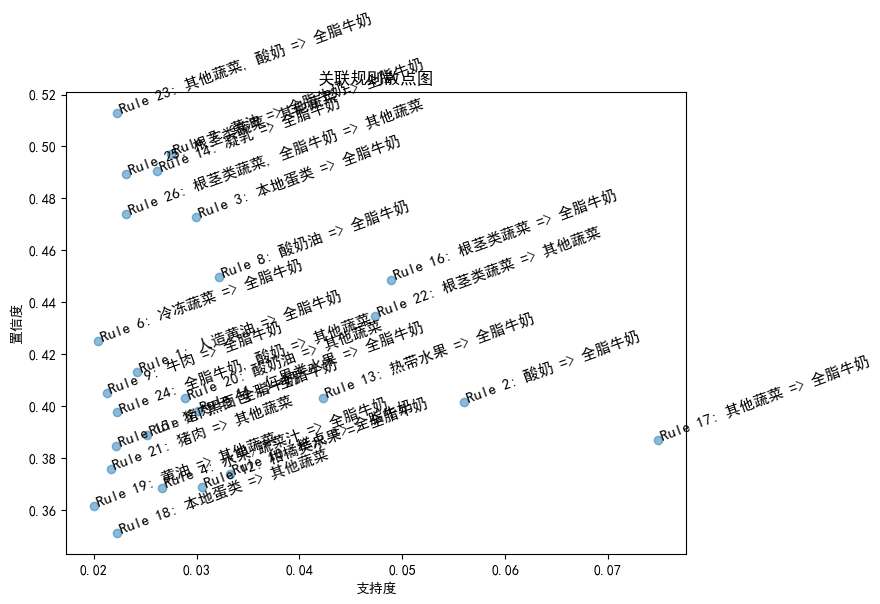

In [107]:


# 整合关联规则数据，包括支持度和置信度
rules = [
    {"antecedents": ("人造黄油",), "consequents": ("全脂牛奶",), "support": 0.024199, "confidence": 0.413194},
    {"antecedents": ("酸奶",), "consequents": ("全脂牛奶",), "support": 0.056024, "confidence": 0.401603},
    {"antecedents": ("本地蛋类",), "consequents": ("全脂牛奶",), "support": 0.029995, "confidence": 0.472756},
    {"antecedents": ("水果/蔬菜汁",), "consequents": ("全脂牛奶",), "support": 0.026640, "confidence": 0.368495},
    {"antecedents": ("黑面包",), "consequents": ("全脂牛奶",), "support": 0.025216, "confidence": 0.388715},
    {"antecedents": ("冷冻蔬菜",), "consequents": ("全脂牛奶",), "support": 0.020437, "confidence": 0.424947},
    {"antecedents": ("黄油",), "consequents": ("全脂牛奶",), "support": 0.027555, "confidence": 0.497248},
    {"antecedents": ("酸奶油",), "consequents": ("全脂牛奶",), "support": 0.032232, "confidence": 0.449645},
    {"antecedents": ("牛肉",), "consequents": ("全脂牛奶",), "support": 0.021251, "confidence": 0.405039},
    {"antecedents": ("糕点",), "consequents": ("全脂牛奶",), "support": 0.033249, "confidence": 0.373714},
    {"antecedents": ("仁果类水果",), "consequents": ("全脂牛奶",), "support": 0.030097, "confidence": 0.397849},
    {"antecedents": ("柑橘类水果",), "consequents": ("全脂牛奶",), "support": 0.030503, "confidence": 0.368550},
    {"antecedents": ("热带水果",), "consequents": ("全脂牛奶",), "support": 0.042298, "confidence": 0.403101},
    {"antecedents": ("凝乳",), "consequents": ("全脂牛奶",), "support": 0.026131, "confidence": 0.490458},
    {"antecedents": ("猪肉",), "consequents": ("全脂牛奶",), "support": 0.022166, "confidence": 0.384480},
    {"antecedents": ("根茎类蔬菜",), "consequents": ("全脂牛奶",), "support": 0.048907, "confidence": 0.448694},
    {"antecedents": ("其他蔬菜",), "consequents": ("全脂牛奶",), "support": 0.074835, "confidence": 0.386758},
    {"antecedents": ("本地蛋类",), "consequents": ("其他蔬菜",), "support": 0.022267, "confidence": 0.350962},
    {"antecedents": ("黄油",), "consequents": ("其他蔬菜",), "support": 0.020031, "confidence": 0.361468},
    {"antecedents": ("酸奶油",), "consequents": ("其他蔬菜",), "support": 0.028876, "confidence": 0.402837},
    {"antecedents": ("猪肉",), "consequents": ("其他蔬菜",), "support": 0.021657, "confidence": 0.375661},
    {"antecedents": ("根茎类蔬菜",), "consequents": ("其他蔬菜",), "support": 0.047382, "confidence": 0.434701},
    {"antecedents": ("其他蔬菜", "酸奶"), "consequents": ("全脂牛奶",), "support": 0.022267, "confidence": 0.512881},
    {"antecedents": ("全脂牛奶", "酸奶"), "consequents": ("其他蔬菜",), "support": 0.022267, "confidence": 0.397459},
    {"antecedents": ("根茎类蔬菜", "其他蔬菜"), "consequents": ("全脂牛奶",), "support": 0.023183, "confidence": 0.489270},
    {"antecedents": ("根茎类蔬菜", "全脂牛奶"), "consequents": ("其他蔬菜",), "support": 0.023183, "confidence": 0.474012},
]

# 提取支持度和置信度数据
supports = [rule["support"] for rule in rules]
confidences = [rule["confidence"] for rule in rules]

# 创建散点图
plt.figure(figsize=(8, 6))
plt.scatter(supports, confidences, alpha=0.5)  # alpha用于调整点的透明度
plt.xlabel("支持度")
plt.ylabel("置信度")
plt.title("关联规则散点图")

# 添加规则标签
for i, rule in enumerate(rules):
    antecedents = ", ".join(rule["antecedents"])
    consequents = ", ".join(rule["consequents"])
    fontsize = 11
    plt.annotate(f"Rule {i+1}: {antecedents} => {consequents}", (supports[i], confidences[i]),rotation=20,fontsize=fontsize)

# 显示散点图
plt.show()


结论：顾客购买其他商品时，会同时购买全脂牛奶，因此应将全脂牛奶放在顾客购买商品的必经之路上，或是放在商场显眼的位置，方便顾客拿取。顾客同时购买蔬菜、根茎类蔬菜、水果、黄油等概率较高，商场应该考虑捆绑销售/距离拉近。